<a href="https://colab.research.google.com/github/RFankhauser/MSc_WI_BINA/blob/main/Semesterarbeit/Datenanalyse_%C3%96V_250222.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import der Daten und grundlegende Analyse

### Import der Daten

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#--------------------------------------------
# Nachfolgenden Code für lokalen Import verwenden
# Datei-Pfad für macOS anpassen
# file_path = r"/Users/remofankhauser/20250222_istdaten.csv"
# Datei einlesen
# df_raw = pd.read_csv(file_path, sep=None)
#--------------------------------------------

# Import aus GitHub
url="https://raw.githubusercontent.com/RFankhauser/MSc_WI_BINA/refs/heads/main/Semesterarbeit/Verkehrsdaten/20250222_vbz_filtered.csv"
df_raw = pd.read_csv(url, sep=",", low_memory=False)


# Format der Datumspalten anpassen
df_raw["ABFAHRTSZEIT"] = pd.to_datetime(df_raw["ABFAHRTSZEIT"], dayfirst=True)
# print(df_raw["ABFAHRTSZEIT"].dtype)
df_raw["AB_PROGNOSE"] = pd.to_datetime(df_raw["AB_PROGNOSE"], dayfirst=True)
# print(df_raw["AB_PROGNOSE"].dtype)


### Analyse der Rohdaten

In [63]:
# Datenstruktur und erste Zeile anzeigen
display(df_raw.info())

# Welche Verkehrsmittel gibt es im Dataframe?
Verkehrsmittel = df_raw["PRODUKT_ID"].unique()
print(f"Verkehrsmittel: {sorted(Verkehrsmittel)}")

# Welche Verkehrsbetriebe gibt es im Dataframe?
Verkehrsbetriebe = df_raw["BETREIBER_NAME"].unique()
print(f"Verkehrsbetriebe: {sorted(Verkehrsbetriebe)}")

# Welche Verkehrsbetriebe (Abk) gibt es im Dataframe?
Verkehrsbetriebe_abk = df_raw["BETREIBER_ABK"].unique()
print(f"Abkürzungen: {sorted(Verkehrsbetriebe_abk)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215318 entries, 0 to 215317
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   BETRIEBSTAG          215318 non-null  object        
 1   FAHRT_BEZEICHNER     215318 non-null  object        
 2   BETREIBER_ID         215318 non-null  object        
 3   BETREIBER_ABK        215318 non-null  object        
 4   BETREIBER_NAME       215318 non-null  object        
 5   PRODUKT_ID           215318 non-null  object        
 6   LINIEN_ID            215318 non-null  object        
 7   LINIEN_TEXT          215318 non-null  object        
 8   UMLAUF_ID            215318 non-null  int64         
 9   VERKEHRSMITTEL_TEXT  215318 non-null  object        
 10  ZUSATZFAHRT_TF       215318 non-null  bool          
 11  FAELLT_AUS_TF        215318 non-null  bool          
 12  BPUIC                215318 non-null  int64         
 13  HALTESTELLEN_N

None

Verkehrsmittel: ['Bus', 'Tram']
Verkehrsbetriebe: ['Verkehrsbetriebe Zürich', 'Verkehrsbetriebe Zürich INFO+']
Abkürzungen: ['VBZ', 'VBZ    Fpl']


## Analyse der VBZ Daten

### Im Dataframe enthaltenen VBZ-Linien

In [64]:
# Beispiel: Gruppieren nach "PRODUKT_ID" (Tram, Bus, ...)
gruppen = df_raw.groupby("PRODUKT_ID")["LINIEN_TEXT"].unique()
print("Alle ÖV-Linien nach Verkehrsmittel")

# Ausgabe: für jede Verkehrsart alle Linien in einer Zeile
for verkehrsmittel, linien in gruppen.items():
    linien_als_text = ", ".join(map(str, linien))
    print(f"{verkehrsmittel}: {linien_als_text}")

Alle ÖV-Linien nach Verkehrsmittel
Bus: 31, 32, 33, 35, 37, 38, 39, 40, 46, 61, 62, 64, 66, 67, 69, 70, 72, 73, 75, 76, 77, 78, 80, 83, 89, 99, 161, 162, 163, 165, 184, 185, 301, 302, 304, 305, 306, 307, 309, 314, 317, 325, N31, N34, N91, N71, N74, N32, N10, N11, N12, N13, N14, N15, N16, N17, N18, N99, N30, N1, N2, N3, N4, N5, N6, N7, N8, N9, N36, 701, 703, 704, 705, 743, 751, 910, 912, 916, 918, 919
Tram: 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17


### Verspätungen berechnen und ausgeben

In [97]:
# Berechne Verspätung in Sekunden
df_raw["VERSPAETUNG_AB"] = (df_raw["ABFAHRTSZEIT"] - df_raw["AB_PROGNOSE"]).dt.total_seconds()


df_filtered_vbz_verspetungen_ab = df_raw[df_raw["VERSPAETUNG_AB"] > 0]

# Liste der zu entfernenden Spalten
columns_to_drop = [
    "ANKUNFTSZEIT", 
    "AN_PROGNOSE", 
    "AN_PROGNOSE_STATUS", 
    "VERKEHRSMITTEL_TEXT", 
    "FAHRT_BEZEICHNER", 
    "BETREIBER_ID", 
    "BETREIBER_ABK", 
    "BPUIC"
]

df_filtered_vbz_verspetungen_ab = df_filtered_vbz_verspetungen_ab.drop(columns=columns_to_drop)


display(df_filtered_vbz_verspetungen_ab.head(1000))
print(f"Länge des DF: {len(df_filtered_vbz_verspetungen_ab)}")




,BETRIEBSTAG,BETREIBER_NAME,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,UMLAUF_ID,ZUSATZFAHRT_TF,FAELLT_AUS_TF,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF,VERSPAETUNG_AB
0,22.02.2025,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,False,False,"Schlieren, Geissweid",2025-02-22 12:28:00,2025-02-22 12:27:55,REAL,False,5.0
3,22.02.2025,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,False,False,"Schlieren, Gasometerbrücke",2025-02-22 12:32:00,2025-02-22 12:31:43,REAL,False,17.0
4,22.02.2025,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,False,False,"Schlieren, Mülligen",2025-02-22 12:33:00,2025-02-22 12:32:52,REAL,False,8.0
10,22.02.2025,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,False,False,"Zürich, Kappeli",2025-02-22 12:40:00,2025-02-22 12:39:56,REAL,False,4.0
13,22.02.2025,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,False,False,"Zürich, Albisriederplatz",2025-02-22 12:44:00,2025-02-22 12:43:59,REAL,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6769,22.02.2025,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10008,False,False,"Zürich, Bezirksgebäude",2025-02-22 09:53:00,2025-02-22 09:52:39,REAL,False,21.0
6785,22.02.2025,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10008,False,False,"Schlieren, Zentrum/Bahnhof",2025-02-22 10:12:00,2025-02-22 10:11:51,REAL,False,9.0
6790,22.02.2025,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10008,False,False,"Schlieren, Gasometerbrücke",2025-02-22 10:25:00,2025-02-22 10:24:42,REAL,False,18.0
6791,22.02.2025,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10008,False,False,"Schlieren, Mülligen",2025-02-22 10:26:00,2025-02-22 10:25:48,REAL,False,12.0


Länge des DF: 23997


In [ ]:
# Stelle sicher, dass BETRIEBSTAG als Datetime-Format vorliegt
df_filtered_vbz_verspetungen_ab["BETRIEBSTAG"] = pd.to_datetime(df_filtered_vbz_verspetungen_ab["BETRIEBSTAG"])

# Definiere den gewünschten Zeitraum -> Wichtig: Remo muss Daten von Zeitraum zur verfügung stellen!!!
start_date = "2022-01-01"
end_date = "2025-01-01"

# Filtere das DataFrame nach dem Zeitraum
df_filtered_vbz_verspetungen_ab = df_filtered_vbz_verspetungen_ab[
    (df_filtered_vbz_verspetungen_ab["BETRIEBSTAG"] >= start_date) & 
    (df_filtered_vbz_verspetungen_ab["BETRIEBSTAG"] <= end_date)
]

# Zeige die ersten 10 Zeilen an
display(df_filtered_vbz_verspetungen_ab.head(10))
print(f"Länge des DF nach Datumsfilter: {len(df_filtered_vbz_verspetungen_ab)}")

C:\Users\Donat\AppData\Local\Temp\ipykernel_8424\359743769.py:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_filtered_vbz_verspetungen_ab["BETRIEBSTAG"] = pd.to_datetime(df_filtered_vbz_verspetungen_ab["BETRIEBSTAG"])


,BETRIEBSTAG,BETREIBER_NAME,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,UMLAUF_ID,ZUSATZFAHRT_TF,FAELLT_AUS_TF,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF,VERSPAETUNG_AB


Länge des DF nach Datumsfilter: 0


### Analyse der Daten

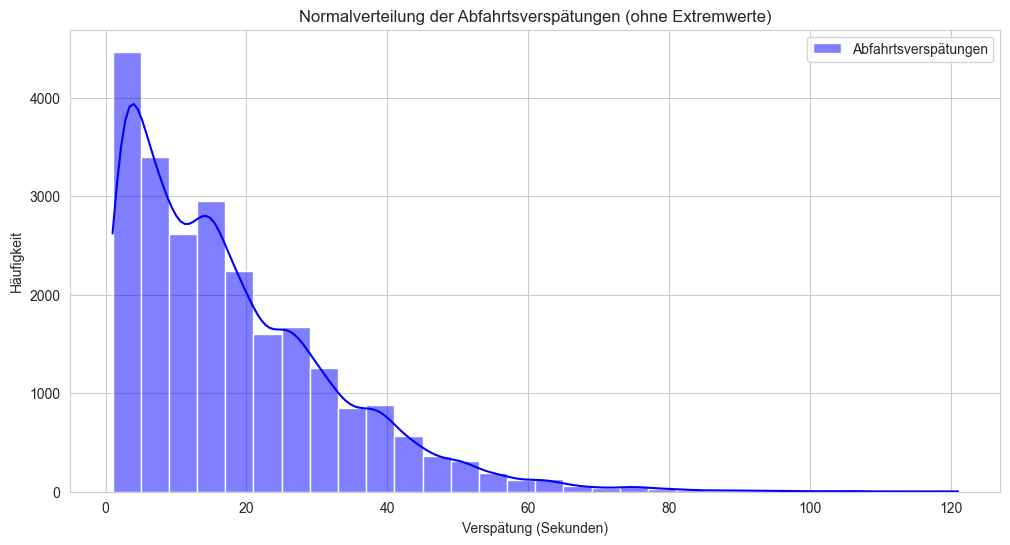

In [66]:
#Donat


# Funktion zur Filterung von Extremwerten (Outlier)
def filter_extreme_values(data, column, std_threshold=1):
    """
    Filtert die Daten, um nur Werte innerhalb von `std_threshold` Standardabweichungen vom Mittelwert zu behalten.
    """
    mean = data[column].mean()
    std = data[column].std()
    lower_bound = mean - std_threshold * std
    upper_bound = mean + std_threshold * std
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Filtere die Verspätungen, um Extremwerte auszuschließen
df_filtered_ab = filter_extreme_values(df_filtered_vbz_verspetungen_ab, "VERSPAETUNG_AB", std_threshold=2)


# Plot für Abfahrtsverspätungen
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered_ab["VERSPAETUNG_AB"], bins=30, kde=True, color='blue', label='Abfahrtsverspätungen')
plt.title("Normalverteilung der Abfahrtsverspätungen (ohne Extremwerte)")
plt.xlabel("Verspätung (Sekunden)")
plt.ylabel("Häufigkeit")
plt.legend()
plt.show()



In [67]:
#Donat2
# Funktion zur Berechnung der Extremwerte und des Schwellenwerts
def calculate_extremes(data, column, std_threshold=2):
    """
    Berechnet die Anzahl der Extremwerte und den Schwellenwert für Extremwerte.
    """
    mean = data[column].mean()
    std = data[column].std()
    lower_bound = mean - std_threshold * std
    upper_bound = mean + std_threshold * std

    # Anzahl der Extremwerte
    extreme_values = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    num_extremes = len(extreme_values)

    # Schwellenwert für Extremwerte
    extreme_threshold = max(abs(lower_bound), abs(upper_bound))

    return num_extremes, extreme_threshold

Anzahl_Datenpunkte_ab=len(df_filtered_vbz_verspetungen_ab)

# Berechne Extremwerte für Abfahrtsverspätungen
num_extremes_ab, threshold_ab = calculate_extremes(df_filtered_vbz_verspetungen_ab, "VERSPAETUNG_AB", std_threshold=2)
print(f"Anzahl der Extremwerte bei Abfahrtsverspätungen: {num_extremes_ab} (Total: {Anzahl_Datenpunkte_ab})")
print(f"Extremwerte bei Abfahrtsverspätungen liegen außerhalb von ±{threshold_ab:.2f} Sekunden.\n")



Anzahl der Extremwerte bei Abfahrtsverspätungen: 112 (Total: 23997)
Extremwerte bei Abfahrtsverspätungen liegen außerhalb von ±121.38 Sekunden.



In [70]:


# Filtere alle Zeilen, in denen die Verspätung > 5 Minuten (300sekunden) ist
df_greater_5_ab = df_filtered_vbz_verspetungen_ab[df_filtered_vbz_verspetungen_ab["VERSPAETUNG_AB"] > 300]

# Anzahl der betroffenen Zeilen
count_ab = len(df_greater_5_ab)

print(f"Anzahl der Datenpunkte mit mehr als 5 Minuten Verspätung: {count_ab}")

Anzahl der Datenpunkte mit mehr als 5 Minuten Verspätung: 35


In [71]:
#Aggregiere die Verspätungen auf stündliche Intervalle
# Neue Spalte: Stündlich abgerundeter Timestamp (z. B. 2025-02-22 12:00:00)
df_filtered_vbz_verspetungen_ab["ABFAHRTSZEIT_aggregiert"] = df_filtered_vbz_verspetungen_ab["ABFAHRTSZEIT"].dt.floor("H")
display(df_filtered_vbz_verspetungen_ab.head(10))

C:\Users\Donat\AppData\Local\Temp\ipykernel_8424\2102033213.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_filtered_vbz_verspetungen_ab["ABFAHRTSZEIT_aggregiert"] = df_filtered_vbz_verspetungen_ab["ABFAHRTSZEIT"].dt.floor("H")


,BETRIEBSTAG,BETREIBER_NAME,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,UMLAUF_ID,ZUSATZFAHRT_TF,FAELLT_AUS_TF,HALTESTELLEN_NAME,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF,VERSPAETUNG_AB,ABFAHRTSZEIT_aggregiert
0,22.02.2025,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,False,False,"Schlieren, Geissweid",2025-02-22 12:28:00,2025-02-22 12:27:55,REAL,False,5.0,2025-02-22 12:00:00
3,22.02.2025,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,False,False,"Schlieren, Gasometerbrücke",2025-02-22 12:32:00,2025-02-22 12:31:43,REAL,False,17.0,2025-02-22 12:00:00
4,22.02.2025,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,False,False,"Schlieren, Mülligen",2025-02-22 12:33:00,2025-02-22 12:32:52,REAL,False,8.0,2025-02-22 12:00:00
10,22.02.2025,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,False,False,"Zürich, Kappeli",2025-02-22 12:40:00,2025-02-22 12:39:56,REAL,False,4.0,2025-02-22 12:00:00
13,22.02.2025,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,False,False,"Zürich, Albisriederplatz",2025-02-22 12:44:00,2025-02-22 12:43:59,REAL,False,1.0,2025-02-22 12:00:00
15,22.02.2025,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,False,False,"Zürich, Lochergut",2025-02-22 12:46:00,2025-02-22 12:45:59,REAL,False,1.0,2025-02-22 12:00:00
17,22.02.2025,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,False,False,"Zürich, Bezirksgebäude",2025-02-22 12:49:00,2025-02-22 12:48:47,REAL,False,13.0,2025-02-22 12:00:00
24,22.02.2025,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,False,False,"Zürich, Opernhaus",2025-02-22 13:02:00,2025-02-22 13:01:54,REAL,False,6.0,2025-02-22 13:00:00
38,22.02.2025,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10002,False,False,"Zürich, Bachmattstrasse",2025-02-22 08:07:00,2025-02-22 08:06:48,REAL,False,12.0,2025-02-22 08:00:00
47,22.02.2025,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10002,False,False,"Zürich,Kalkbreite/Bhf.Wiedikon",2025-02-22 08:18:00,2025-02-22 08:17:53,REAL,False,7.0,2025-02-22 08:00:00


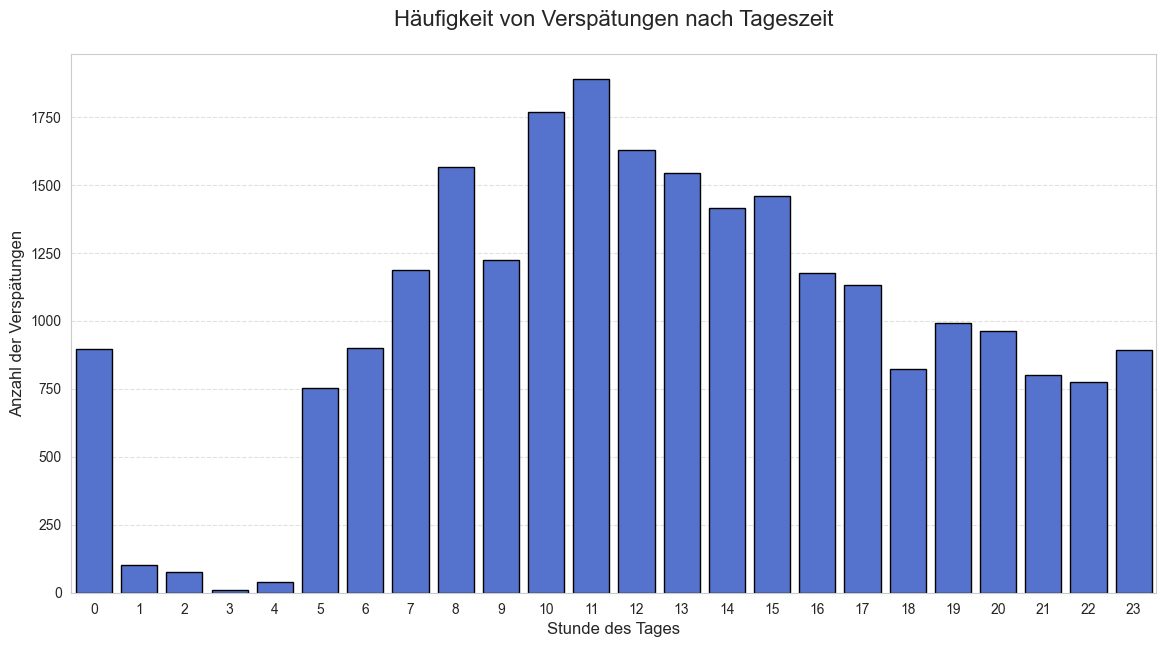

In [72]:
# Extrahiere die Stunde aus der aggregierten Abfahrtszeit
df_filtered_vbz_verspetungen_ab["hour"] = df_filtered_vbz_verspetungen_ab["ABFAHRTSZEIT_aggregiert"].dt.hour

# Gruppiere nach Stunde und zähle die Verspätungen
delay_counts = (
    df_filtered_vbz_verspetungen_ab
    .groupby("hour")
    .size()  # Zählt alle Einträge pro Stunde
    .reset_index(name="Anzahl_Verspaetungen")
)

# Stelle sicher, dass alle 24 Stunden im Plot erscheinen (auch Stunden ohne Verspätungen)
all_hours = pd.DataFrame({"hour": range(24)})
delay_counts = all_hours.merge(delay_counts, on="hour", how="left").fillna(0)

# Plot mit Seaborn
plt.figure(figsize=(14, 7))
sns.barplot(
    x="hour",
    y="Anzahl_Verspaetungen",
    data=delay_counts,
    color="royalblue",
    edgecolor="black"
)

# Formatierung
plt.title("Häufigkeit von Verspätungen nach Tageszeit", fontsize=16, pad=20)
plt.xlabel("Stunde des Tages", fontsize=12)
plt.ylabel("Anzahl der Verspätungen", fontsize=12)
plt.xticks(range(0, 24))
plt.xlim(-0.5, 23.5)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.show()

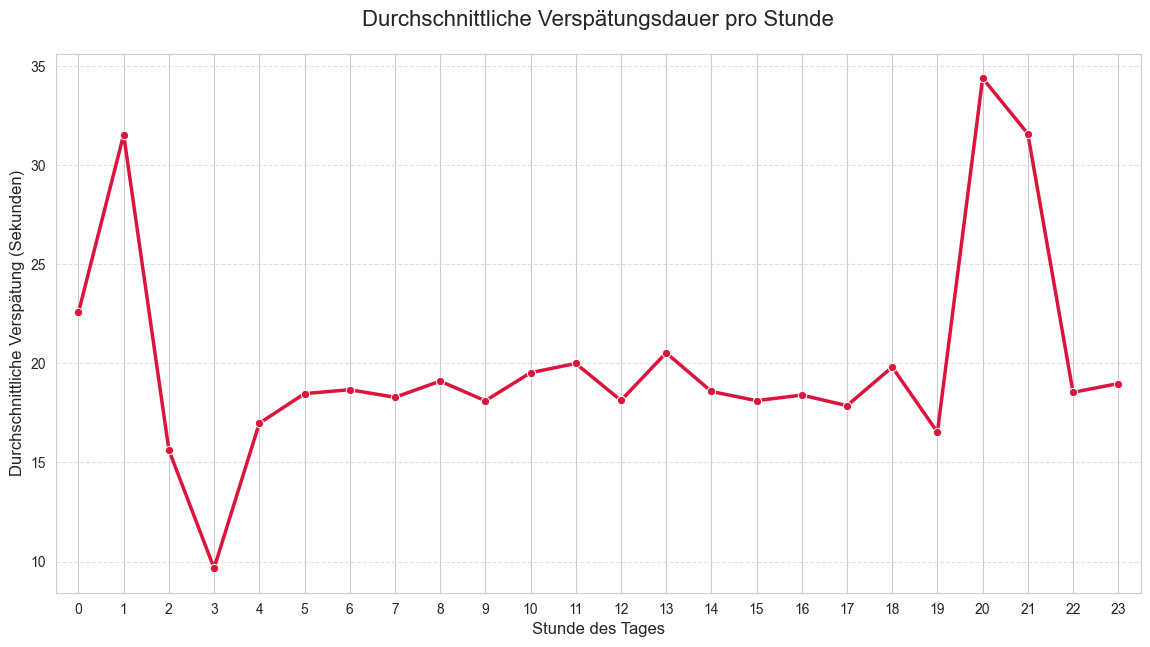

In [73]:
# Extrahiere die Stunde aus der aggregierten Abfahrtszeit
df_filtered_vbz_verspetungen_ab["hour"] = df_filtered_vbz_verspetungen_ab["ABFAHRTSZEIT_aggregiert"].dt.hour

# Berechne die durchschnittliche Verspätung pro Stunde
average_delay = (
    df_filtered_vbz_verspetungen_ab
    .groupby("hour")["VERSPAETUNG_AB"]
    .mean()  # Durchschnitt pro Stunde
    .reset_index(name="durchschnittliche_verspaetung_sekunden")
)

# Stelle sicher, dass alle 24 Stunden im Plot erscheinen (auch Stunden ohne Daten)
all_hours = pd.DataFrame({"hour": range(24)})
average_delay = all_hours.merge(average_delay, on="hour", how="left").fillna(0)

# Plot mit Seaborn (Liniendiagramm)
plt.figure(figsize=(14, 7))
sns.lineplot(
    x="hour",
    y="durchschnittliche_verspaetung_sekunden",
    data=average_delay,
    marker="o",
    color="crimson",
    linewidth=2.5
)



# Formatierung
plt.title("Durchschnittliche Verspätungsdauer pro Stunde", fontsize=16, pad=20)
plt.xlabel("Stunde des Tages", fontsize=12)
plt.ylabel("Durchschnittliche Verspätung (Sekunden)", fontsize=12)
plt.xticks(range(0, 24))
plt.xlim(-0.5, 23.5)
plt.grid(axis="y", linestyle="--", alpha=0.6)


plt.show()

In [74]:

# 1. Wetterdatensatz einlesen
df_wetter = pd.read_csv("wetter_zurich_bereinigt.csv", sep=";")

# 2. Spaltennamen anpassen (gemäß der Legende)
parameter_mapping = {
    "fu3010h1": "Böenspitze_kmh",
    "gre000h0": "Globalstrahlung_Wm2",
    "tre200h0": "Temperatur_C",
    "rre150h0": "Niederschlag_mm",
    "fu3010h0": "Windgeschwindigkeit_kmh"
}

df_wetter = df_wetter.rename(columns=parameter_mapping)
display(df_wetter.head(10))

,stn,time,Böenspitze_kmh,Globalstrahlung_Wm2,Temperatur_C,Niederschlag_mm,Windgeschwindigkeit_kmh
0,NABZUE,2022010100,14.0,-2,6.1,0.0,6.8
1,NABZUE,2022010101,11.2,-2,5.9,0.0,6.1
2,NABZUE,2022010102,12.2,-2,5.6,0.0,4.7
3,NABZUE,2022010103,6.8,-2,4.6,0.0,2.5
4,NABZUE,2022010104,7.6,-2,4.5,0.0,4.3
5,NABZUE,2022010105,6.1,-1,4.2,0.0,2.5
6,NABZUE,2022010106,10.4,-2,4.0,0.0,5.0
7,NABZUE,2022010107,8.6,-1,3.9,0.0,3.2
8,NABZUE,2022010108,10.1,21,3.5,0.0,5.4
9,NABZUE,2022010109,6.8,119,3.3,0.0,4.3


In [99]:
# 3. Zeitstempel konvertieren (ohne Zeitzonenanpassung)
df_wetter["timestamp_merge"] = pd.to_datetime(df_wetter["time"], format="%Y%m%d%H", errors="coerce")

# 4. Fehlende Werte behandeln
df_wetter = df_wetter.replace("-", pd.NA)



# 6. Merge mit den Verkehrsdaten
# Annahme: df_merged ist der DataFrame mit den Verkehrsdaten und enthält eine Spalte "ABFAHRTSZEIT_aggregiert"
df_merged = pd.merge(
    df_filtered_vbz_verspetungen_ab,  # Verkehrsdaten
    df_wetter,  # Wetterdaten
    left_on="ABFAHRTSZEIT_aggregiert",  # Zeitstempel in den Verkehrsdaten
    right_on="timestamp_merge",         # Zeitstempel in den Wetterdaten
    how="left"  # Behalte alle Verkehrsdaten, auch wenn keine Wetterdaten vorhanden sind
)

# 7. Überprüfen des gemergten DataFrames
display(df_merged.head(10))

KeyError: 'ABFAHRTSZEIT_aggregiert'